In [1]:
from profile_classification import *

In [2]:
domain = [50 * i for i in range(1, 11)]
print(f"The domain goes from depth {domain[0]} m to {domain[-1]} m.")
PROFS = get_all_profiles()
projected_PROFS = get_projected_celerity_profiles(PROFS, domain)
print(f"The number of profiles that can be projected on the domain is {len(projected_PROFS)}.")
suppress_nans_celerities(projected_PROFS)

The domain goes from depth 50 m to 500 m.
The number of profiles that can be projected on the domain is 7783.


In [32]:
def test_kmean(nb_classes):
    kmeans_model = train_and_return_kmeans_model(projected_PROFS, nb_classes)
    centers_groups = kmeans_model.cluster_centers_
    plot_profiles(centers_groups, xlabel='celerity', title=f'center of kMean classification with {nb_classes} classes')
    classif_kmeans = k_means_classification(projected_PROFS, nb_classes)
    #print(classif_kmeans[:50])
    plot_classification(projected_PROFS, classif_kmeans, title=f'Kmean classification with {nb_classes} classes')

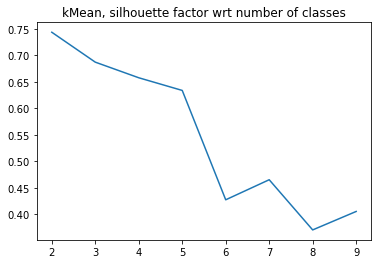

In [38]:
X = np.array([prof.celerities for prof in projected_PROFS])
silhouettes = []
ks = range(2, 10)
for k in ks:
    kmeans = train_and_return_kmeans_model(projected_PROFS, k)
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouettes.append(silhouette)
plt.plot(ks, silhouettes)
plt.title('kMean, silhouette factor wrt number of classes')
plt.show()

(2, 3)


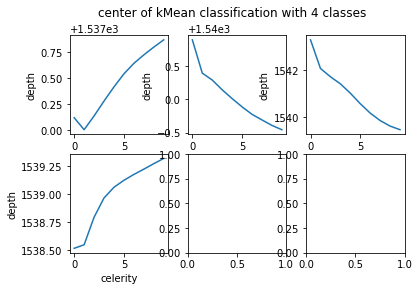

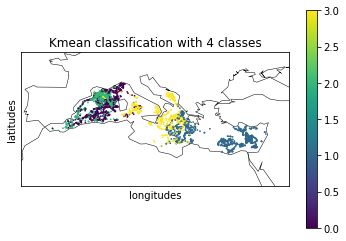

In [34]:
test_kmean(4)

(2, 3)


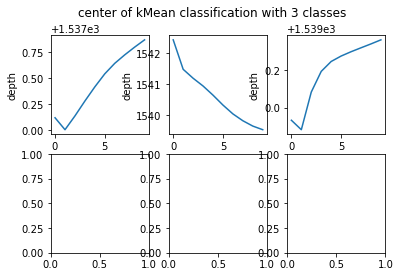

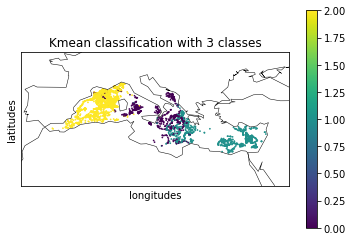

In [35]:
test_kmean(3)

c:\users\thiba\anaconda3\envs\hydrology\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=100 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


The number of profiles classified by dbscan is 7104.
This corresponds to 91.3% of the projected profiles.
(2, 3)


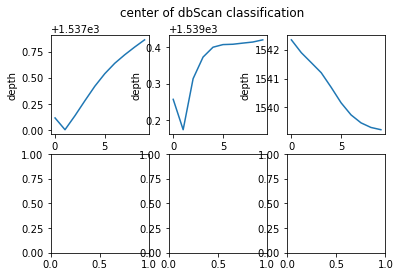

In [16]:
classif_dbscan = dbscan_classification(projected_PROFS, 0.9, 100)[1]
classified_PROFS_idx = []
for ind in range(len(projected_PROFS)):
    if classif_dbscan[ind] != -1:
        classified_PROFS_idx.append(ind)
classified_PROFS = [projected_PROFS[ind] for ind in classified_PROFS_idx]
classif_dbscan = [classif_dbscan[ind] for ind in classified_PROFS_idx]
proportion_classified = len(classified_PROFS_idx) / len(projected_PROFS)
print(f"The number of profiles classified by dbscan is {len(classified_PROFS_idx)}.")
print(f"This corresponds to {100 * round(proportion_classified, 3)}% of the projected profiles.")

#plot_classification([projected_PROFS[ind] for ind in classified_PROFS_idx],
                            #[classif_dbscan[ind] for ind in classified_PROFS_idx])

centers_dbscan = get_mean_profiles(classified_PROFS, classif_dbscan)
plot_profiles(centers_dbscan, title='center of dbScan classification', xlabel='celerity')

In [8]:
def test_GMM(nb_classes_GMM):
    for cov_type in ['full', 'diag', 'tied', 'spherical']:
        GMM_model = train_and_return_GMM_model(projected_PROFS, nb_classes_GMM, covariance_type=cov_type)
        classif_GMM = GMM_classification(projected_PROFS, GMM_model)
        plot_classification(projected_PROFS, classif_GMM,
                                title=f'Gaussian mixture model classification with {nb_classes_GMM} classes, covariance type : {cov_type}')
        centers = get_mean_profiles(projected_PROFS, classif_GMM)
        plot_profiles(centers, axs_shape=(1, nb_classes_GMM), title=f'center of GMM covariance type {cov_type}')


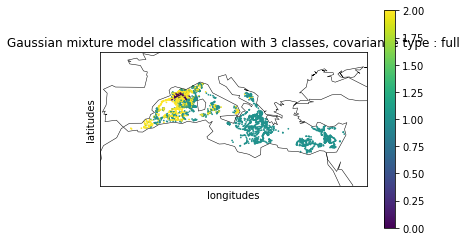

(1, 3)


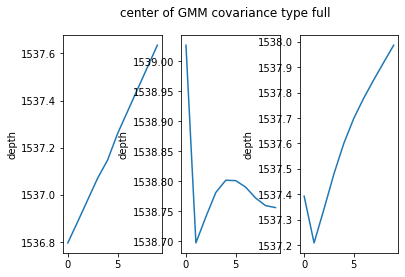

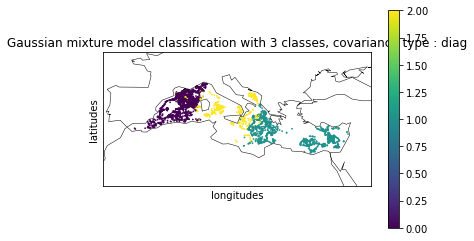

(1, 3)


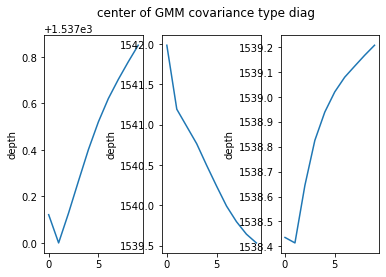

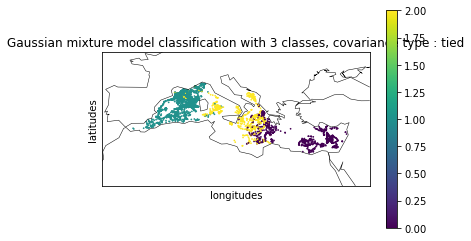

(1, 3)


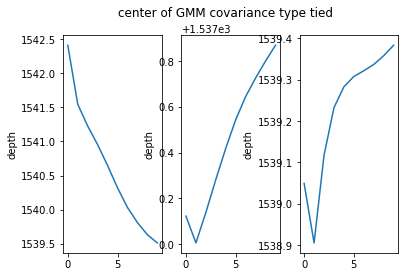

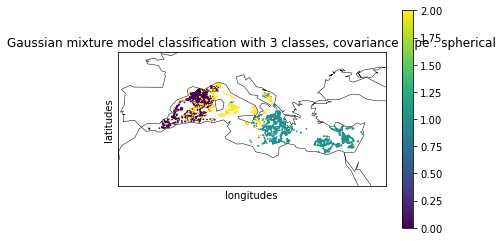

(1, 3)


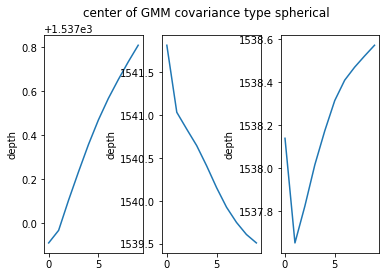

In [9]:
test_GMM(3)

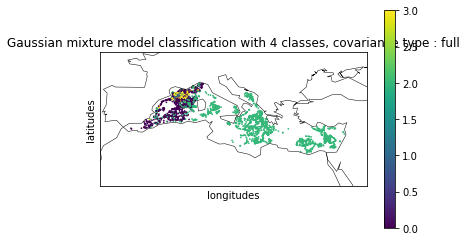

(1, 4)


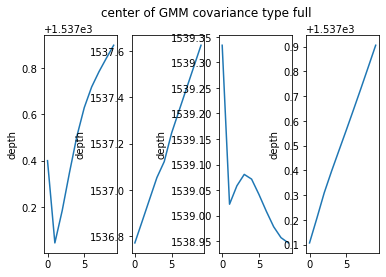

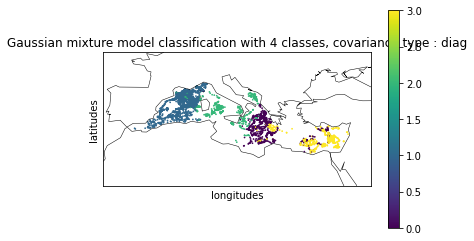

(1, 4)


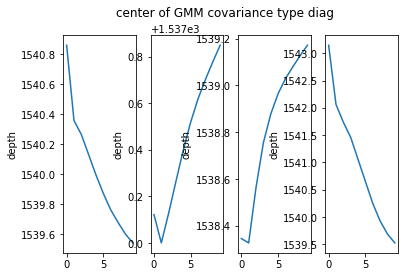

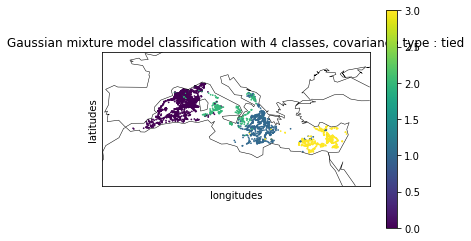

(1, 4)


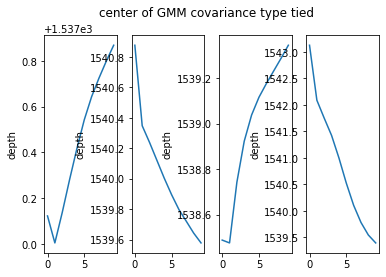

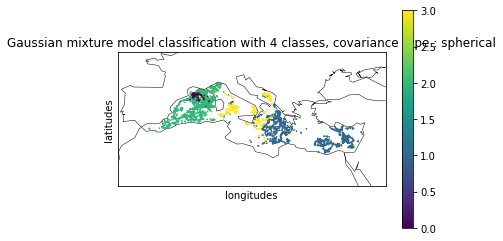

(1, 4)


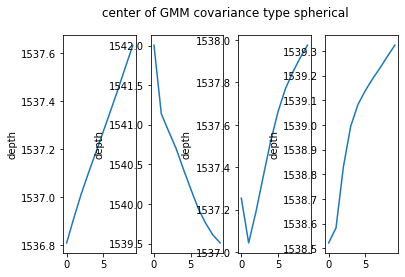

In [10]:
test_GMM(4)